## DowJones Industrial Average Index Stocks Analysis

### Introduction
This EDA project aims to extract stocks and respective data, which make up DowJones Industrial Average Index.  
Data will be extracted using python's own library for yahoo finance called 'yahoo_fin'.

### Outline
1)

<hr style="border-top: 2px solid blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [3]:
import numpy as np

import pandas as pd
pd.set_option('max_rows', 50)   
pd.set_option('max_columns', 100)
pd.set_option('precision', 2)   # round to two decimal points
pd.set_option('float_format', '{:,.2f}'.format)   # suppress scientific notation globally

import datetime

# Yahoo_fin has two modules - stock_info and options
from yahoo_fin.stock_info import\
get_analysts_info, get_balance_sheet, get_cash_flow, get_data,\
get_day_gainers,get_day_losers, get_day_most_active,\
get_holders, get_income_statement, get_live_price,\
tickers_dow, tickers_nasdaq, tickers_sp500,\
get_quote_table, get_stats, get_stats_valuation\

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Get List of Stocks in Dow Jones Index

In [4]:
dow_stocks = tickers_dow()
dow_stocks
len(dow_stocks)

['AAPL',
 'AMGN',
 'AXP',
 'BA',
 'CAT',
 'CRM',
 'CSCO',
 'CVX',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'TRV',
 'UNH',
 'V',
 'VZ',
 'WBA',
 'WMT']

30

#### Get Average Monthly Data for all 30 Dow Jones Stocks, for Year 2020

In [5]:
dow_historical = {}
for stock in dow_stocks:
    dow_historical[stock] = get_data(stock, start_date='01/01/2020', end_date='31/12/2020', index_as_date = False, interval='1mo')

In [6]:
dow_historical_df = pd.DataFrame()

for stock,data in dow_historical.items():
    dow_historical_df = pd.concat([dow_historical_df, data] , axis=0)

dow_historical_df.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2020-01-01,74.06,81.96,73.19,77.38,76.36,2934370400,AAPL
1,2020-02-01,76.07,81.81,64.09,68.34,67.44,3019279200,AAPL
2,2020-03-01,70.57,76.00,53.15,63.57,62.88,6280072400,AAPL
3,2020-04-01,61.62,73.63,59.22,73.45,72.65,3265299200,AAPL
4,2020-05-01,71.56,81.06,71.46,79.49,78.62,2805936000,AAPL


In [7]:
dow_historical_df['month'] = dow_historical_df['date'].dt.month

#### Average Trading Volume Comparison

<Figure size 864x288 with 0 Axes>

<AxesSubplot:xlabel='ticker'>

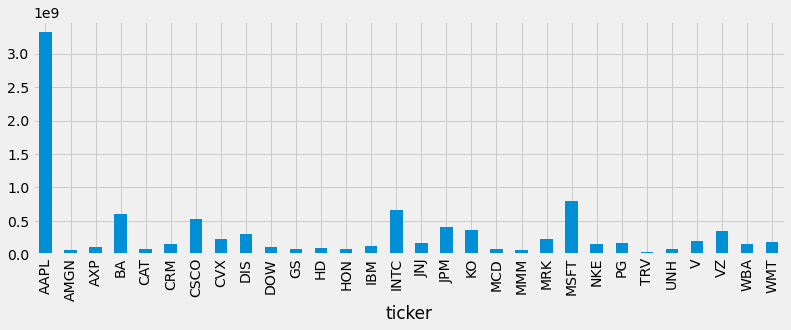

In [16]:
plt.figure(figsize=(12,4))
dow_historical_df.groupby('ticker')['volume'].mean().plot.bar()

Apple is the most traded stock, far ahead of the next stock Microsoft. Next 3 are Intel, Boeing and Cisco

#### Comparing Price for Top Technology Stocks

In [22]:
tickers = ['AAPL', 'IBM', 'MSFT', 'INTC', 'CSCO']

dow_tickers = dow_historical_df[dow_historical_df['ticker'].isin(tickers)]    

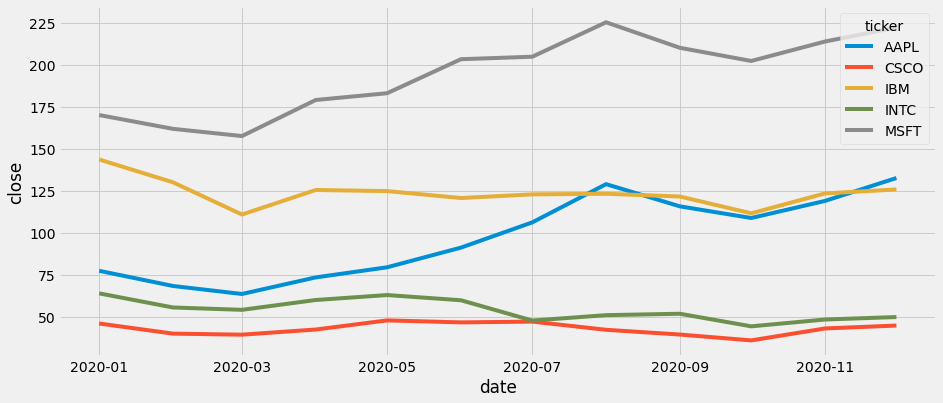

In [23]:
plt.figure(figsize=(14,6))
sns.lineplot(x='date', y='close', hue='ticker', data=dow_tickers);

IBM, Intel and Cisco have mostly remained flat throughout the year.  
Apple and Microsoft seems to follow strikingly similar trend

#### Get Fundamentals Data for all 30 Dow Jones Stocks

In [25]:
dow_stats = {}

for stock in dow_stocks:
    dow_stats[stock] = get_stats_valuation(stock)

In [26]:
dow_stats_df = pd.concat(dow_stats)
dow_stats_df.head(9)

0      1
AAPL 0      Market Cap (intraday) 5  2.48T
     1           Enterprise Value 3  2.56T
     2                 Trailing P/E  29.36
     3                Forward P/E 1  26.45
     4  PEG Ratio (5 yr expected) 1   1.34
     5            Price/Sales (ttm)   7.14
     6             Price/Book (mrq)  38.63
     7   Enterprise Value/Revenue 3   7.36
     8    Enterprise Value/EBITDA 7  23.05

In [27]:
dow_stats_df.reset_index(inplace=True)
dow_stats_df.head()

,level_0,level_1,0,1
0,AAPL,0,Market Cap (intraday) 5,2.48T
1,AAPL,1,Enterprise Value 3,2.56T
2,AAPL,2,Trailing P/E,29.36
3,AAPL,3,Forward P/E 1,26.45
4,AAPL,4,PEG Ratio (5 yr expected) 1,1.34


In [28]:
dow_stats_df.drop(['level_1'], inplace=True, axis=1)

In [30]:
dow_stats_df.columns = ["Ticker", "Stat", "Value"]
dow_stats_df.head(9)

,Ticker,Stat,Value
0,AAPL,Market Cap (intraday) 5,2.48T
1,AAPL,Enterprise Value 3,2.56T
2,AAPL,Trailing P/E,29.36
3,AAPL,Forward P/E 1,26.45
4,AAPL,PEG Ratio (5 yr expected) 1,1.34
5,AAPL,Price/Sales (ttm),7.14
6,AAPL,Price/Book (mrq),38.63
7,AAPL,Enterprise Value/Revenue 3,7.36
8,AAPL,Enterprise Value/EBITDA 7,23.05


#### Comparing P/E Ratio

In [41]:
pe_ratios = dow_stats_df[dow_stats_df['Stat'] == 'Trailing P/E'].copy()

In [42]:
pe_ratios['Value'] = pe_ratios['Value'].astype(float)

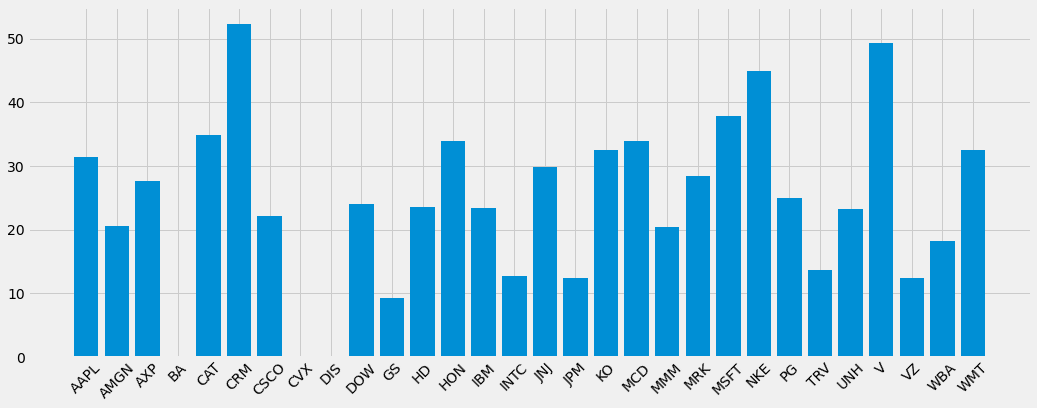

In [47]:
plt.figure(figsize=(16,6))
plt.bar(pe_ratios['Ticker'],pe_ratios['Value'])
plt.xticks(rotation=45);

Top 3 P/E ratios - Salesforce(CRM), Visa(V), Nike(NIKE)

#### Comparing Enterprise Value/Revenue Ratio

In [31]:
enterprise_value = dow_stats_df[dow_stats_df['Stat'] == 'Enterprise Value/Revenue 3'].copy()

In [32]:
enterprise_value['Value'] = enterprise_value['Value'].astype(float)

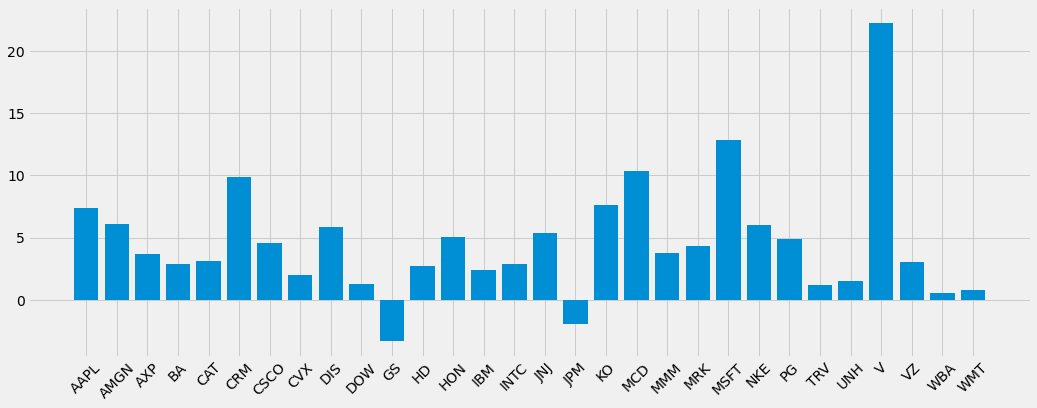

In [33]:
plt.figure(figsize=(16,6))
plt.bar(enterprise_value['Ticker'],enterprise_value['Value'])
plt.xticks(rotation=45);

Visa has the highest value compared to revenue, almost double that of next which is Microsoft.  
These two are followed by McDonalds, Salesforce and Apple.  
Goldman Sachs and JPMorgan have negative value compared to revenue.

***So, what does having negative enterprise value signify ?***  
Yahoo Finance has good news report on this [here](https://finance.yahoo.com/news/negative-enterprise-value-does-really-215939487.html)  
"A negative enterprise value means that a company has more cash than it would need to pay off any debt and buy back all its stocks in one go, if it really wanted to." 

#### Top 10 Stocks with Highest Institutional Holding

In [ ]:
holders = {}
for stock in dow_stocks:
    holders[stock] = get_holders(stock)['Major Holders']

In [46]:
holders_df = pd.DataFrame(pd.concat(holders))
holders_df.head()

0                                      1
AAPL 0   0.07%        % of Shares Held by All Insider
     1  58.45%       % of Shares Held by Institutions
     2  58.49%        % of Float Held by Institutions
     3    4958  Number of Institutions Holding Shares
AMGN 0   0.20%        % of Shares Held by All Insider

In [47]:
holders_df.reset_index(inplace=True)
holders_df = holders_df[holders_df[1] == '% of Shares Held by Institutions']
holders_df.head()

,level_0,level_1,0,1
1,AAPL,1,58.45%,% of Shares Held by Institutions
5,AMGN,1,77.53%,% of Shares Held by Institutions
9,AXP,1,86.93%,% of Shares Held by Institutions
13,BA,1,54.09%,% of Shares Held by Institutions
17,CAT,1,69.87%,% of Shares Held by Institutions


In [48]:
holders_df.drop(['level_1',1], axis=1, inplace=True)
holders_df.columns = ['ticker','inst_holding']
holders_df.head()

,ticker,inst_holding
1,AAPL,58.45%
5,AMGN,77.53%
9,AXP,86.93%
13,BA,54.09%
17,CAT,69.87%


In [51]:
holders_df['inst_holding'] = holders_df['inst_holding'].str.replace('%','').astype('float')

In [55]:
holders_df.sort_values('inst_holding', ascending=False).head(10)

,ticker,inst_holding
105,V,96.64
101,UNH,89.09
9,AXP,86.93
97,TRV,84.36
89,NKE,82.98
21,CRM,80.39
5,AMGN,77.53
49,HON,76.98
25,CSCO,75.09
81,MRK,74.82


Visa has 96.64% of shares held by Institutional Investors

#### Top Institutional Holders

In [56]:
holders = {}
for stock in dow_stocks:
    holders[stock] = get_holders(stock)['Direct Holders (Forms 3 and 4)']

In [58]:
top_holders = pd.DataFrame(pd.concat(holders))
top_holders.head()

Holder      Shares Date Reported  % Out  \
AAPL 0  Vanguard Group, Inc. (The)  1264936543  Jun 29, 2021  7.65%   
     1              Blackrock Inc.  1028698316  Jun 29, 2021  6.22%   
     2     Berkshire Hathaway, Inc   887135554  Jun 29, 2021  5.37%   
     3    State Street Corporation   622579947  Jun 29, 2021  3.77%   
     4                    FMR, LLC   350462986  Jun 29, 2021  2.12%   

               Value  
AAPL 0  173245708929  
     1  140890521359  
     2  121502085475  
     3   85268549541  
     4   47999410562

In [59]:
top_holders.reset_index(inplace=True)
top_holders.head()

,level_0,level_1,Holder,Shares,Date Reported,% Out,Value
0,AAPL,0,"Vanguard Group, Inc. (The)",1264936543,"Jun 29, 2021",7.65%,173245708929
1,AAPL,1,Blackrock Inc.,1028698316,"Jun 29, 2021",6.22%,140890521359
2,AAPL,2,"Berkshire Hathaway, Inc",887135554,"Jun 29, 2021",5.37%,121502085475
3,AAPL,3,State Street Corporation,622579947,"Jun 29, 2021",3.77%,85268549541
4,AAPL,4,"FMR, LLC",350462986,"Jun 29, 2021",2.12%,47999410562


In [63]:
top_holders.rename({'level_0':'ticker'},axis=1,inplace=True)

In [65]:
top_holders.rename({'% Out':'holding%'},axis=1,inplace=True)

In [68]:
top_holders['holding%'] = top_holders['holding%'].str.replace('%','').astype('float')

In [61]:
top_holders.drop('level_1', axis=1, inplace=True)

In [69]:
top_holders.head()

,ticker,Holder,Shares,Date Reported,holding%,Value
0,AAPL,"Vanguard Group, Inc. (The)",1264936543,"Jun 29, 2021",7.65,173245708929
1,AAPL,Blackrock Inc.,1028698316,"Jun 29, 2021",6.22,140890521359
2,AAPL,"Berkshire Hathaway, Inc",887135554,"Jun 29, 2021",5.37,121502085475
3,AAPL,State Street Corporation,622579947,"Jun 29, 2021",3.77,85268549541
4,AAPL,"FMR, LLC",350462986,"Jun 29, 2021",2.12,47999410562


In [77]:
top_holders['Holder'].value_counts().sort_values(ascending=False).head(10)

Blackrock Inc.                         30
State Street Corporation               30
Vanguard Group, Inc. (The)             30
Geode Capital Management, LLC          29
Northern Trust Corporation             22
FMR, LLC                               17
Bank of America Corporation            14
Wellington Management Group, LLP       13
Morgan Stanley                         12
Bank Of New York Mellon Corporation    10
Name: Holder, dtype: int64

In [78]:
top_holders.sort_values('holding%', ascending=False).head(10)

,ticker,Holder,Shares,Date Reported,holding%,Value
20,AXP,"Berkshire Hathaway, Inc",151610700,"Jun 29, 2021",19.08,25050635961
170,KO,"Berkshire Hathaway, Inc",400000000,"Jun 29, 2021",9.28,21644000000
200,MRK,"Vanguard Group, Inc. (The)",225553790,"Jun 29, 2021",8.91,17541318248
160,JPM,"Vanguard Group, Inc. (The)",263376146,"Jun 29, 2021",8.81,40965525748
150,JNJ,"Vanguard Group, Inc. (The)",231432368,"Jun 29, 2021",8.79,38126168304
110,HD,"Vanguard Group, Inc. (The)",93403489,"Mar 30, 2021",8.78,28511415017
230,PG,"Vanguard Group, Inc. (The)",214832442,"Jun 29, 2021",8.78,28987341399
240,TRV,"Vanguard Group, Inc. (The)",21650753,"Jun 29, 2021",8.68,3241334231
40,CAT,"Vanguard Group, Inc. (The)",47434967,"Jun 29, 2021",8.66,10323271868
180,MCD,"Vanguard Group, Inc. (The)",64186119,"Mar 30, 2021",8.59,14386676712
